In [29]:
import jieba 
import sys 
import json
import jieba
import random
import pandas as pd
import os.path as path
from opencc import OpenCC
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
freq_dict_list = []
with open('../dataset/topics_with_score.json',encoding = 'utf8') as file:
    data = json.load(file)
for term_per_cluster in data:
    tmp_dict = {}
    for term_tuple in term_per_cluster:
        if term_tuple[1] != 0:
            if term_tuple[0] == "面":
                term_tuple[0] = "麵" 
            tmp_dict[term_tuple[0]] = term_tuple[1]
    freq_dict_list.append(tmp_dict)

In [31]:
#wc_img_path = "output/cloudimg.png"
mask_img_path = "/Users/clairetsai818/Downloads/img.jpg"
fontpath = '/System/Library/Assets/com_apple_MobileAsset_Font3/85c1c77a7c430b02315e74dec55f9a7f004f556b.asset/AssetData/华文细黑.ttf'

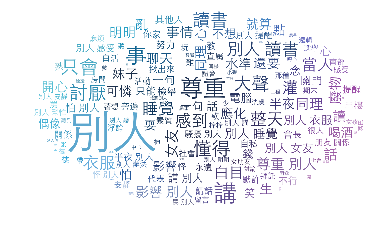

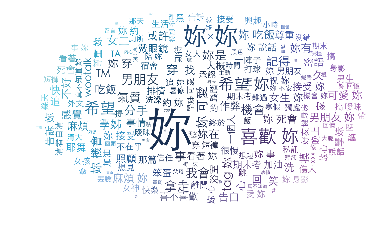

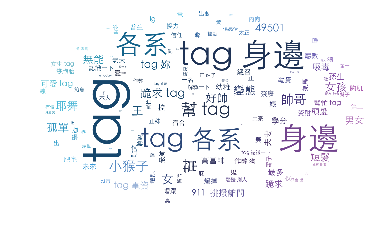

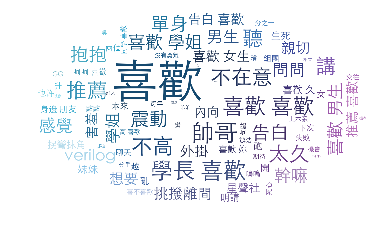

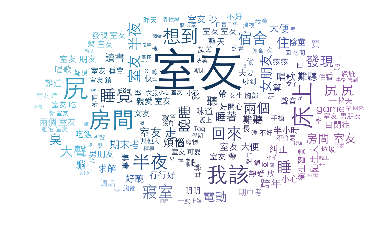

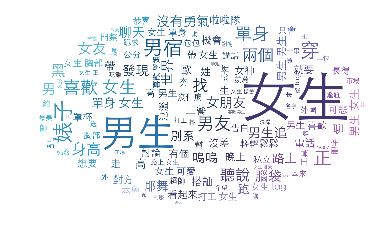

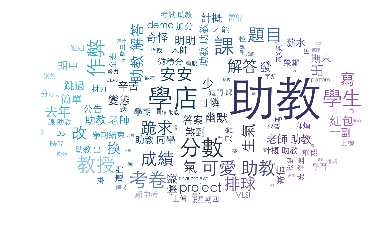

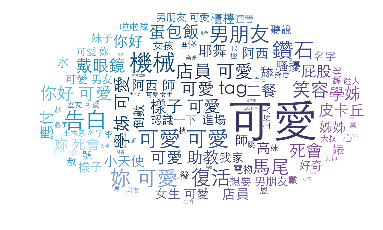

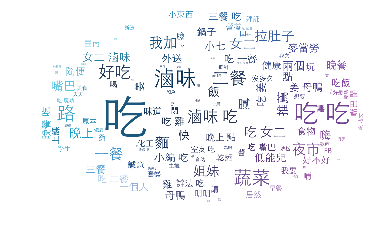

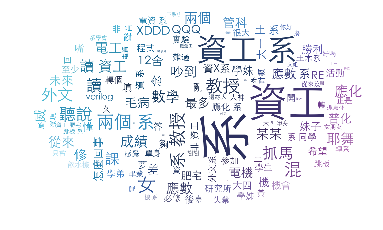

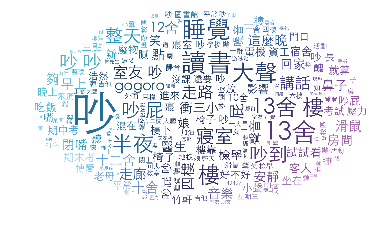

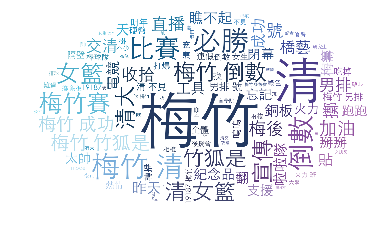

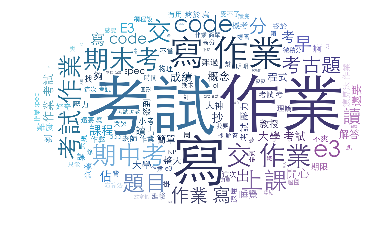

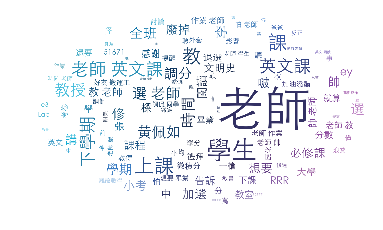

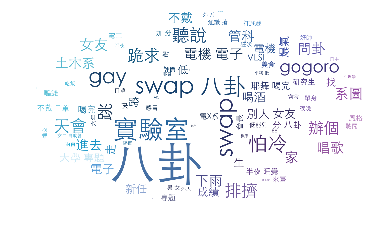

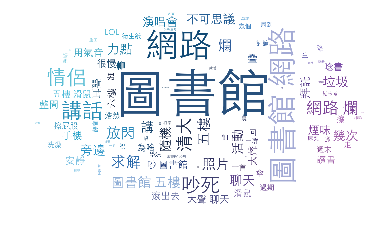

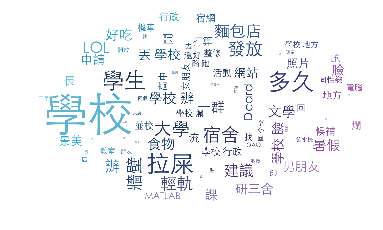

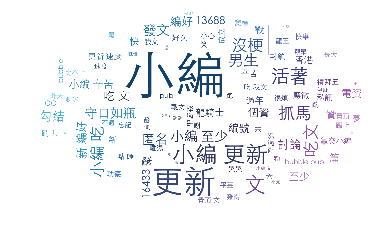

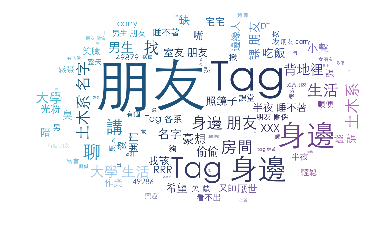

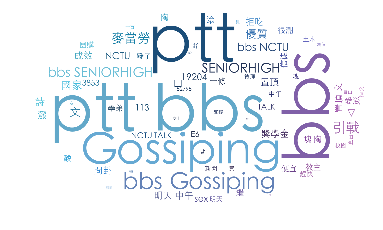

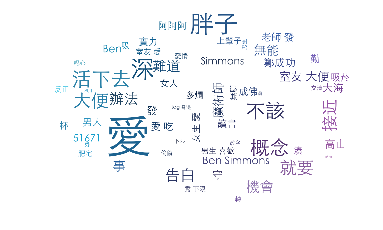

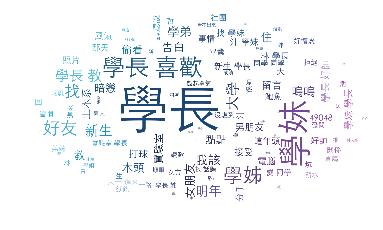

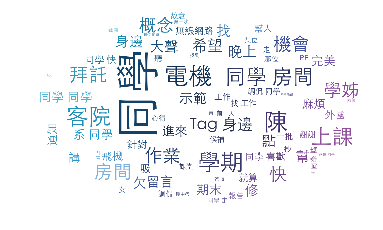

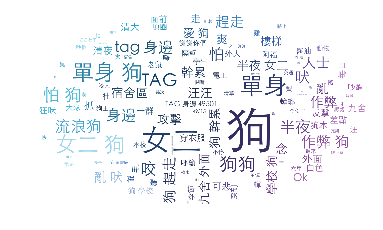

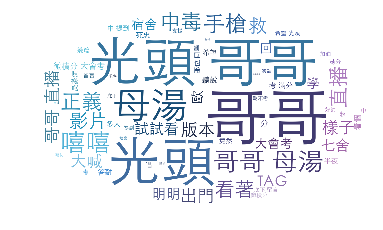

In [32]:
for idx, freq_dict in enumerate(freq_dict_list):
    wc_img_path = "../visualization_result/wordcloud_img/cluster" + str(idx) + ".png"
    img_coloring = imread(mask_img_path)
    wc = WordCloud(font_path = fontpath, background_color = 'white', mask = img_coloring).generate_from_frequencies(freq_dict)

    # create coloring from image 
    image_colors = ImageColorGenerator(img_coloring) 
    # recolor wordcloud and show 
    wc.recolor(color_func=image_colors)
    plt.imshow(wc)

    #是否顯示x軸、y軸下標 
    plt.axis("off") 

    plt.show()
    wc.to_file(path.join(wc_img_path))